### Import library

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn import tree

### Load Dataset

In [2]:
train_images, train_labels = loadlocal_mnist(images_path='../images/mnist-dataset/train-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/train-labels-idx1-ubyte')

In [3]:
test_images, test_labels = loadlocal_mnist(images_path='../images/mnist-dataset/t10k-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/t10k-labels-idx1-ubyte')

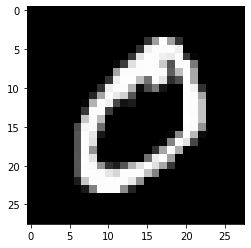

In [4]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [5]:
# Validasi nilai label pada index yang ditentukan
train_labels[1]

0

### Extract HOG Feature

In [6]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')

<BarContainer object of 1296 artists>

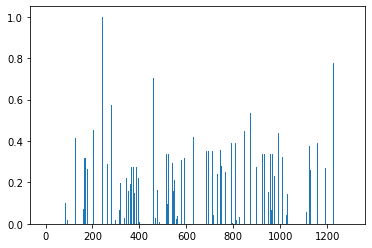

In [7]:
plt.bar(list(range(feature.shape[0])), feature)

### Pre-processing HOG image 

In [8]:
# dimensi fitur dari hasil ekstrak HOG
n_dims = feature.shape[0]

# jumlah sample dari train image
n_samp = train_images.shape[0]

In [9]:
n_samp

60000

In [10]:
x_train, y_train = datasets.make_classification(n_samples=n_samp, n_features=n_dims)

In [11]:
x_train.shape

(60000, 1296)

In [ ]:
# Mengambil fitur dari gambar dan dimasukkan kedalam dataset
for i in range(n_samp):
    x_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    y_train[i] = train_labels[i]

### Konversi kategori label kedalam 'one hot label' 

In [272]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_train_one_hot = lb.transform(y_train)

In [273]:
y_train_one_hot[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [274]:
y_train[1]

0

In [275]:
import numpy as np
label = lb.inverse_transform(np.array([y_train_one_hot[1]]))

In [276]:
label[0]

0

## Klasifikasi Menggunakan 'Decision Trees (DTs)'

In [277]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train_one_hot)

### Prediksi Dataset percobaan

In [278]:
# Prediksi Dataset percobaan
n_samp = test_images.shape[0]
x_test, y_test = datasets.make_classification(n_samples=n_samp, n_features=n_dims)

# Mengambil fitur dari contoh gambar dan dimasukkan kedalam dataset
for i in range(n_samp):
    x_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    y_test[i] = test_labels[i]

In [279]:
y_test_one_hot = lb.transform(y_test)
y_pred_one_hot = clf.predict(x_test)
y_pred = lb.inverse_transform(y_pred_one_hot)

In [280]:
y_pred.shape

(10000,)

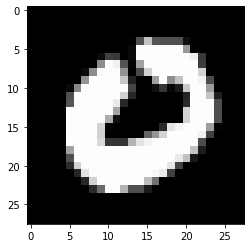

In [282]:
plt.imshow(test_images[25].reshape(28,28), cmap='gray')

In [283]:
out_one_hot = clf.predict(x_test[25].reshape(1, n_dims))
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [284]:
out[0]

0

## Evaluasi Matriks

### Confussion Matrix

In [285]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 886,    5,   13,   11,    5,    8,   22,    4,    8,   18],
       [   9, 1092,    4,    3,    9,    2,    1,    4,   10,    1],
       [  12,   11,  871,   65,   12,    3,    7,   20,   20,   11],
       [   9,    1,   37,  816,    8,   39,    6,   15,   45,   34],
       [  17,   13,   14,   10,  828,    4,   18,   18,   18,   42],
       [  13,    0,    6,   39,    4,  751,   28,    5,   27,   19],
       [  18,    6,    9,    5,   13,   26,  863,    2,   10,    6],
       [   3,   10,   30,   15,   23,    4,    3,  869,   21,   50],
       [  21,    7,   34,   60,   18,   29,   18,   19,  730,   38],
       [  18,   10,   11,   18,   29,   12,    6,   39,   47,  819]])

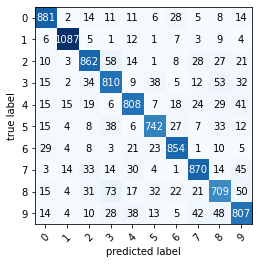

In [260]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### Preccision

In [286]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
precision

array([0.88071571, 0.94545455, 0.84645287, 0.7831094 , 0.87249737,
       0.85535308, 0.88786008, 0.87336683, 0.77991453, 0.78901734])

### Recall

In [287]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.90408163, 0.96211454, 0.84399225, 0.80792079, 0.84317719,
       0.84192825, 0.90083507, 0.84533074, 0.74948665, 0.81169475])

### Accuracy

In [288]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8525

### F1 Score

In [289]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.8510688178163803